# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic.select_dtypes(exclude=object).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [5]:
#your code here- categorical variable

titanic.select_dtypes(include=object).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# your code here
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

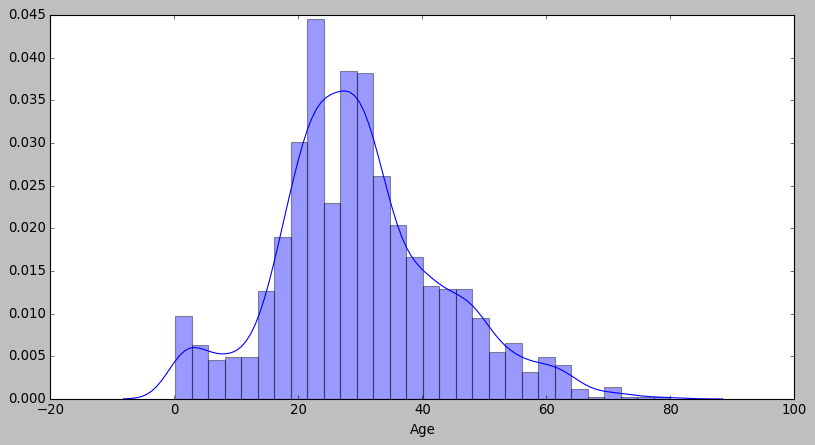

In [14]:
# your code here
sns.distplot(titanic.Age, norm_hist=True, kde=True)

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

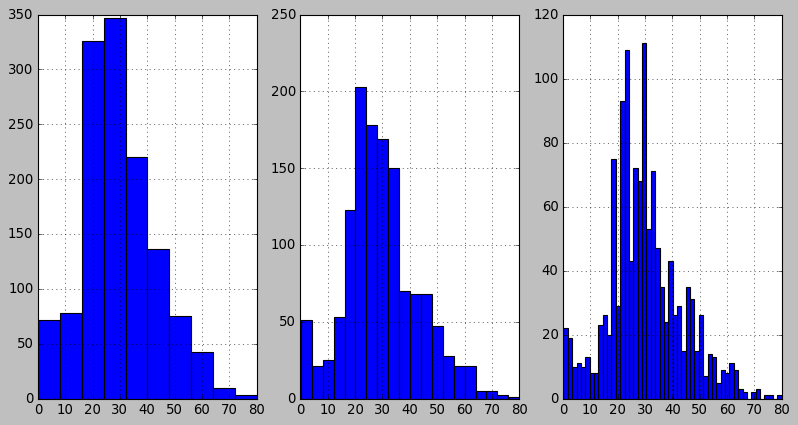

In [13]:
# your code here
#plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
titanic['Age'].hist();
plt.subplot(1,3,2)
titanic['Age'].hist(bins=20);
plt.subplot(1,3,3)
titanic['Age'].hist(bins=50);

#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here
# Ofcourse, my horse, it does! 
# It is easier to identify and discriminate with a larger bins number, this is due to the step of our data, which is equals to one, 
# therefore it is better segmented, closer to the real data, than the smallest number of bins

#### Use seaborn to show the distribution of the column `Age`

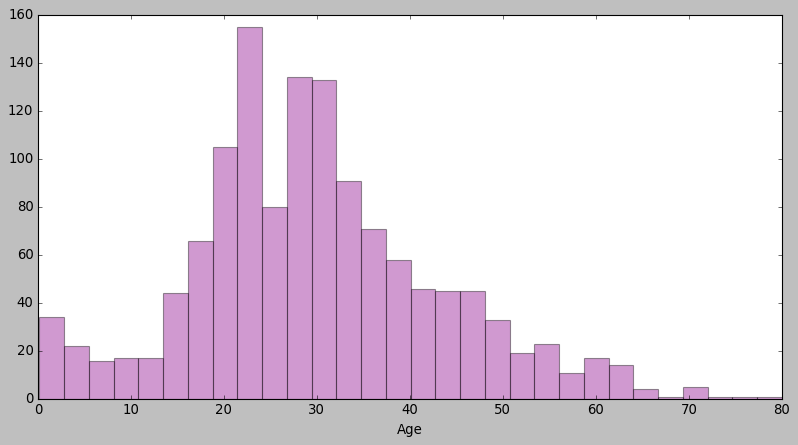

In [19]:
# your code here
sns.distplot(titanic.Age, norm_hist=False, kde=False, color='darkmagenta')

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

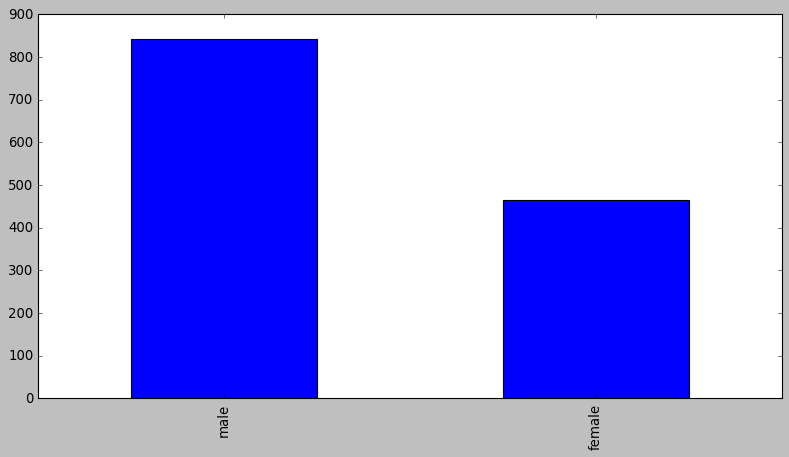

In [36]:
# your code here- 1st way -- Matplotlib
titanic['Gender'].value_counts().plot(kind='bar');

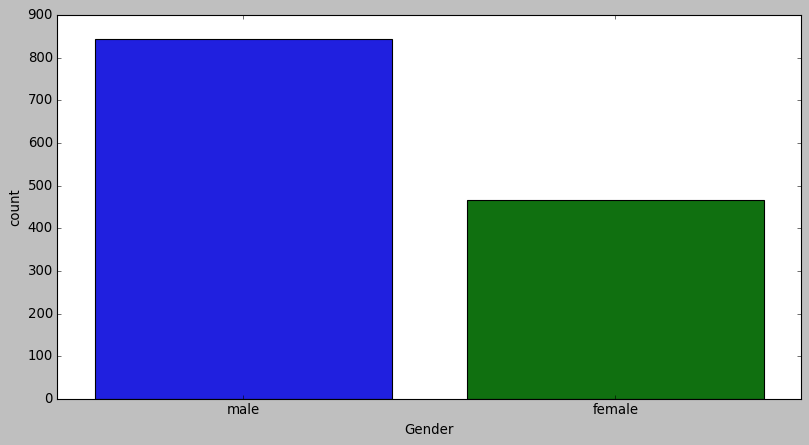

In [22]:
# your code here- 2nd way

# your code here- 2nd way
sns.countplot(x='Gender',data=titanic);

#### Use the appropriate plot to visualize the column `Pclass` 


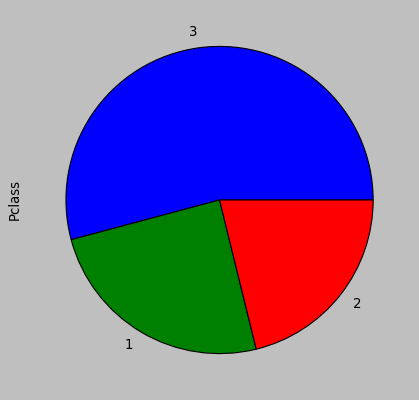

In [35]:
# your code here
titanic['Pclass'].value_counts().plot(kind='pie');

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

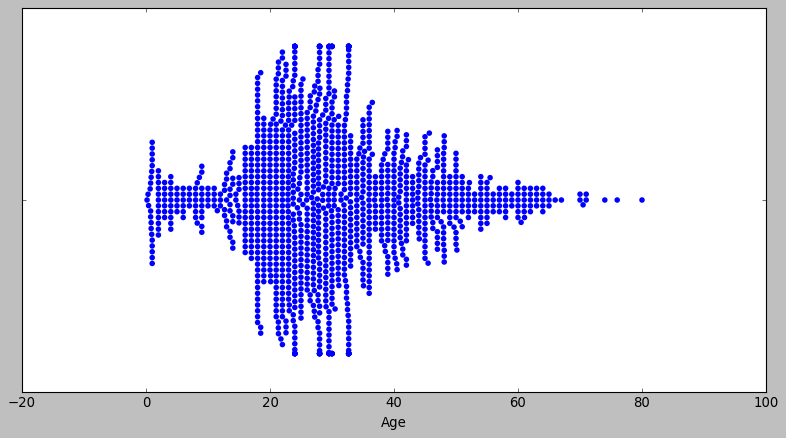

In [34]:
# your code here
sns.swarmplot(x='Age', data= titanic);

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
# The highest density is between 18 and 40 years, there are just a few (10) people above 65, so this is a 'young' dataset
# There were a lot of babies, children in general

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

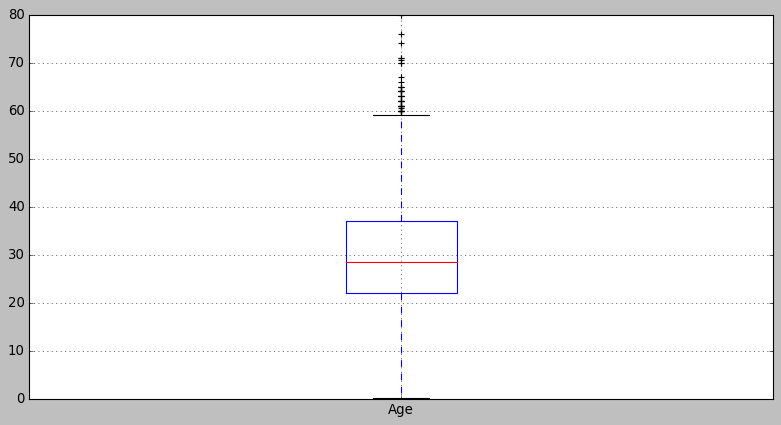

In [38]:
#your code here
titanic.boxplot(column='Age')
plt.grid(color='k', axis='both');

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here
# The median age is 28-29 years
# There are some outliers passing 59 years

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

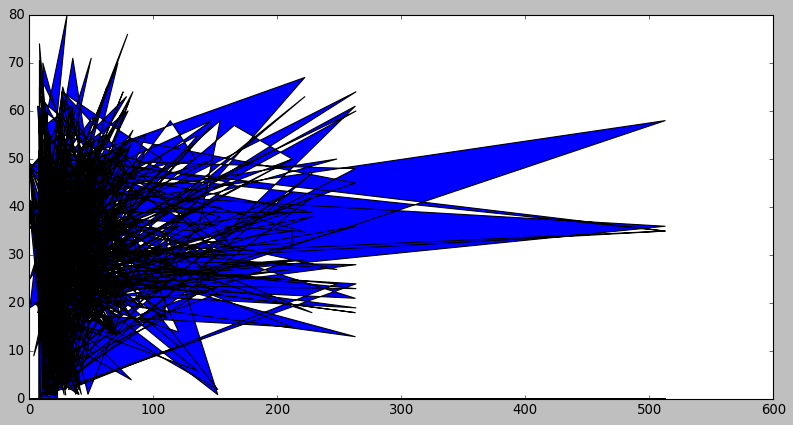

In [52]:
#your code-1st way
fig, ax = plt.subplots()
ax.stackplot(titanic['Fare'], titanic['Age']);
# This demonstrate that not every plot is usefull, no matter how good-locking it might be ;)''

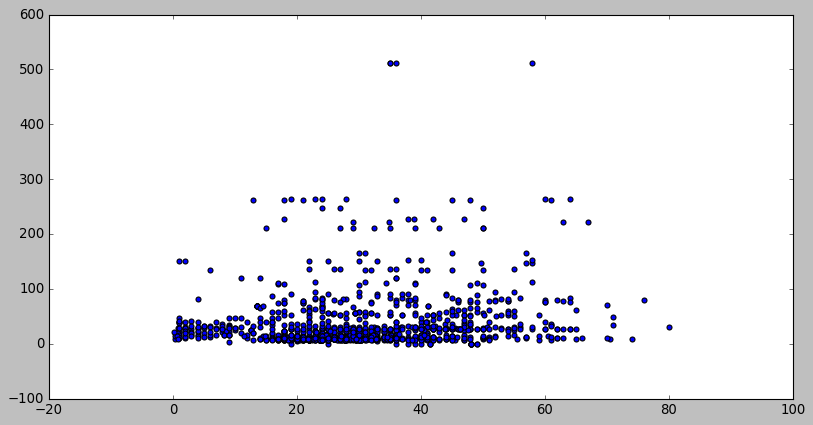

In [54]:
#your code-1st way
x = titanic['Fare']
y = titanic['Age']
plt.scatter(y,x);

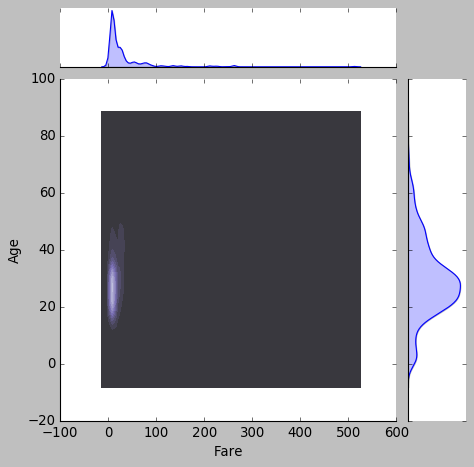

In [60]:
# your code-2nd way
sns.jointplot(x=titanic["Fare"], y=titanic["Age"], kind='kde',  cmap="Purples_d");

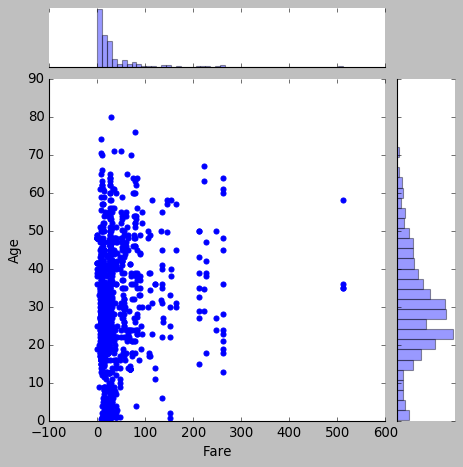

In [62]:
sns.jointplot(x=titanic["Fare"], y=titanic["Age"], kind='scatter',  cmap="Purples_d");

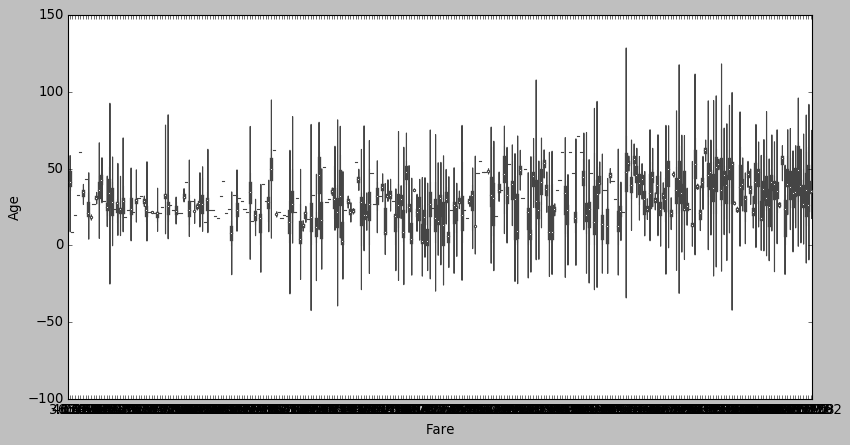

In [61]:
sns.violinplot(x='Fare', y='Age', data=titanic);

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

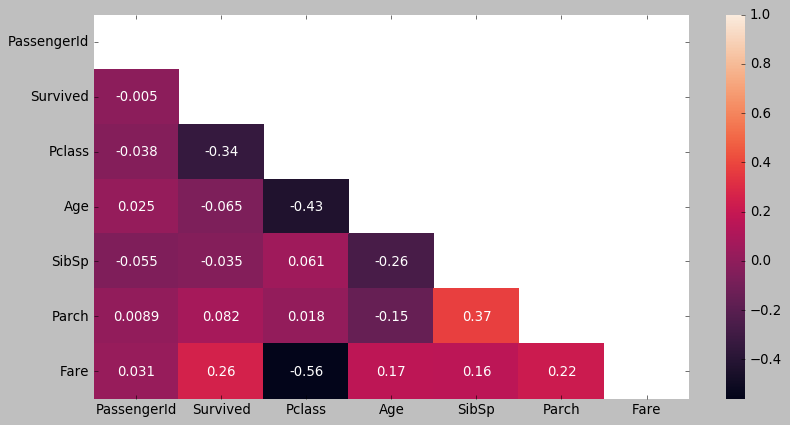

In [69]:
#your code here
pearson_corr = titanic.corr(method='pearson')
sns.heatmap(pearson_corr, annot=True, mask=np.triu(np.ones_like(pearson_corr, dtype=np.bool)));

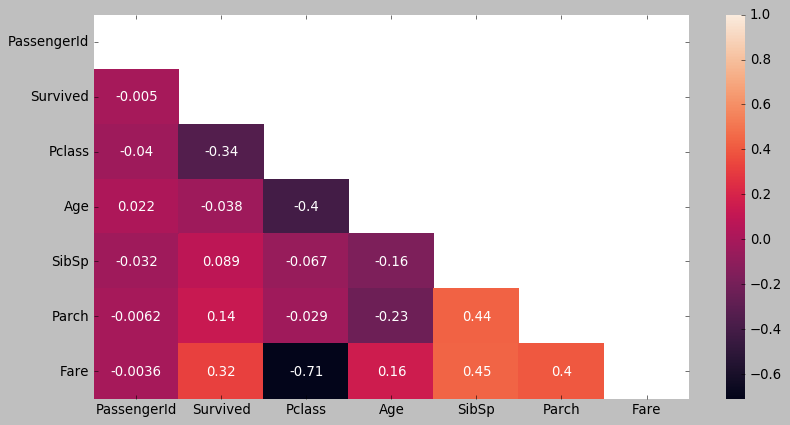

In [68]:
#your code here
spearman_corr = titanic.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, mask=np.triu(np.ones_like(spearman_corr, dtype=np.bool)));

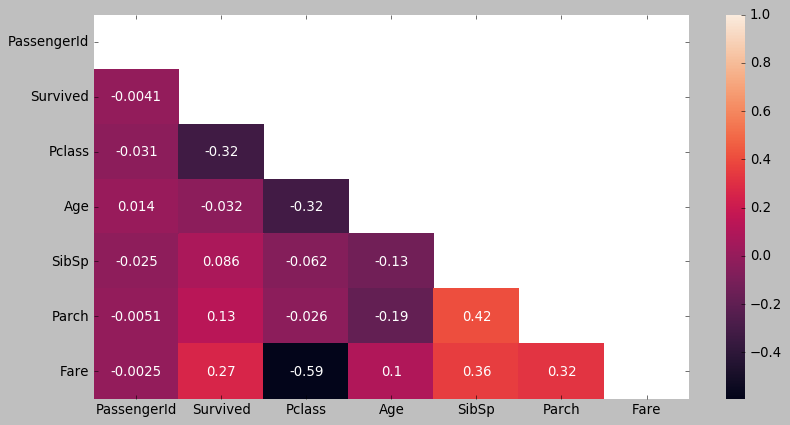

In [71]:
kendall_corr = titanic.corr(method='kendall')
sns.heatmap(kendall_corr, annot=True, mask=np.triu(np.ones_like(kendall_corr, dtype=np.bool)));

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here
# According to Kendall and Pearson methods, Parch and SibSp have the strongest correlation
# According to Spearman, the most notorious correlation is between Fare and SibSp
# We can say that the most correlated feature is SibSp

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

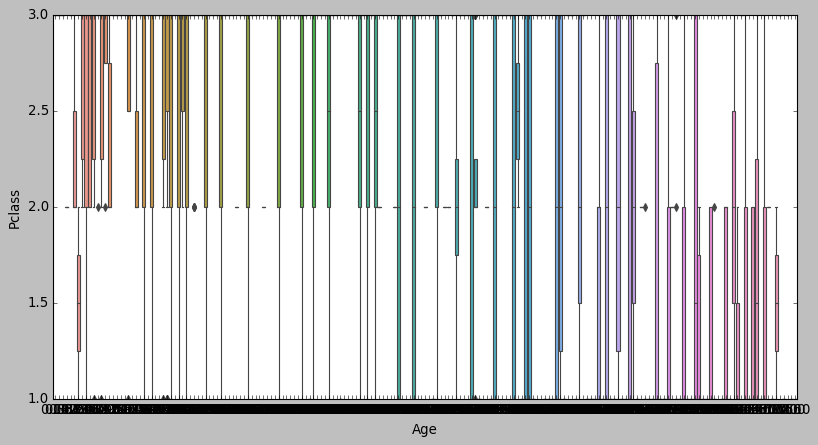

In [73]:
#your code here
sns.boxplot(x='Age',y='Pclass', data=titanic);

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

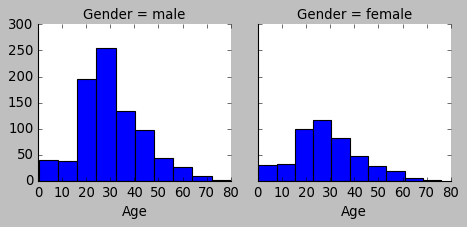

In [77]:
#your code here
Gender = sns.FacetGrid(data=titanic,col='Gender')
Gender.map(plt.hist,'Age')